In [241]:
import torch
import torchvision
from fastai.data.all import *

In [222]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }');

## 신경망의 표현 (${\boldsymbol x} \to \hat{\boldsymbol y}$ 로 가는 과정을 그림으로 표현)

### 예제1: $\hat{y}_i = \text{sigmoid}\big({\hat{w}_0 + \hat{w}_1 x_i}\big) = \text{sigmoid}(u_i), \quad i=1,2,\dots,n$

**(정확한 표현)**

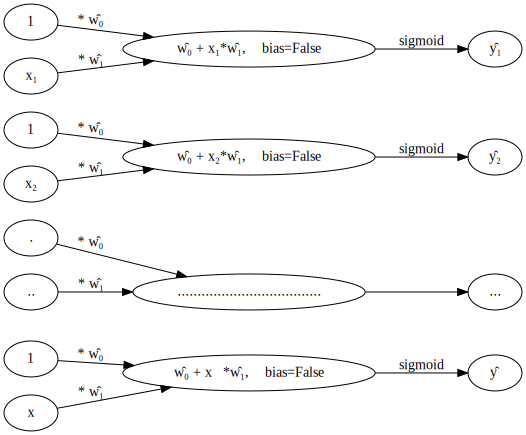

In [76]:
#hide_input
gv(''' 
    "1" -> "ŵ₀ + xₙ*ŵ₁,    bias=False"[label="* ŵ₀"]
    "xₙ" -> "ŵ₀ + xₙ*ŵ₁,    bias=False"[label="* ŵ₁"]
    "ŵ₀ + xₙ*ŵ₁,    bias=False" -> "ŷₙ"[label="sigmoid"]

    "." -> "...................................."[label="* ŵ₀"]
    ".." -> "...................................."[label="* ŵ₁"]
    "...................................." -> "..."[label=" "]

    "1 " -> "ŵ₀ + x₂*ŵ₁,    bias=False"[label="* ŵ₀"]
    "x₂" -> "ŵ₀ + x₂*ŵ₁,    bias=False"[label="* ŵ₁"]
    "ŵ₀ + x₂*ŵ₁,    bias=False" -> "ŷ₂"[label="sigmoid"]
    
    "1  " -> "ŵ₀ + x₁*ŵ₁,    bias=False"[label="* ŵ₀"]
    "x₁" -> "ŵ₀ + x₁*ŵ₁,    bias=False"[label="* ŵ₁"]
    "ŵ₀ + x₁*ŵ₁,    bias=False" -> "ŷ₁"[label="sigmoid"]
''')

- 단점: 똑같은 그림의 반복이 너무 많음

**(observation 반복을 생략)**

모든 $i$에 대하여 아래의 그림을 반복한다는 의미에서 $i$를 명시하는게 명확함. 

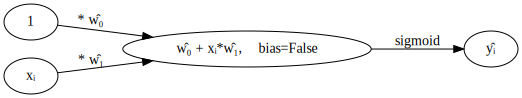

In [77]:
#hide_input
gv(''' 
    "1" -> "ŵ₀ + xᵢ*ŵ₁,    bias=False"[label="* ŵ₀"]
    "xᵢ" -> "ŵ₀ + xᵢ*ŵ₁,    bias=False"[label="* ŵ₁"]
    "ŵ₀ + xᵢ*ŵ₁,    bias=False" -> "ŷᵢ"[label="sigmoid"]

''')


그런데 아래와 같이 $i$생략 하는 경우가 많음 

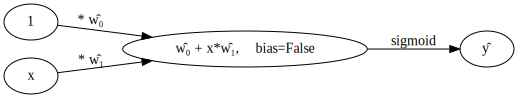

In [78]:
#hide_input
gv(''' 
    "1" -> "ŵ₀ + x*ŵ₁,    bias=False"[label="* ŵ₀"]
    "x" -> "ŵ₀ + x*ŵ₁,    bias=False"[label="* ŵ₁"]
    "ŵ₀ + x*ŵ₁,    bias=False" -> "ŷ"[label="sigmoid"]

''')


**(bias생략)**

bias=True를 주면 1을 생략할 수 있음 

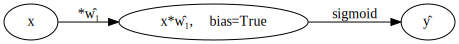

In [79]:
#hide_input
gv('''
"x" -> "x*ŵ₁,    bias=True"[label="*ŵ₁"] ;
"x*ŵ₁,    bias=True" -> "ŷ"[label="sigmoid"] ''')


위의 경우 $\hat{w}_1$대신에 $\hat{w}$를 써도 무방

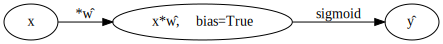

In [80]:
#hide_input
gv('''
"x" -> "x*ŵ,    bias=True"[label="*ŵ"] ;
"x*ŵ,    bias=True" -> "ŷ"[label="sigmoid"] ''')


`bias=True` 옵션은 생략가능 

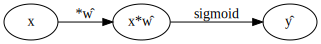

In [81]:
#hide_input
gv('''
"x" -> "x*ŵ"[label="*ŵ"] ;
"x*ŵ" -> "ŷ"[label="sigmoid"] ''')


hat도 보통 생략한다. 

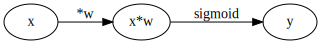

In [86]:
#hide_input
gv('''
"x" -> "x*w"[label="*w"] ;
"x*w" -> "y"[label="sigmoid"] ''')


선형변환의 결과는 $u$로 표현한다. 

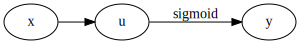

In [88]:
#hide_input
gv('''
"x" -> "u";
"u" -> "y"[label="sigmoid"] ''')


다이어그램은 그리는 사람의 취향에 따라 조금 다르게 그려지긴 합니다. 

저는 아래처럼 기호로 쓰는게 더 이해가 잘되는 편입니다. (그리고 hat도 생략하기 싫어해요) 

$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u} \overset{a_1}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$
- $a_1(x) =\text{sigmoid}(x)=\frac{e^x}{1+e^{x}}$

### 예제2: $\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,2)}{\boldsymbol u^{(1)}} \overset{relu}{\to} \underset{(n,2)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,2)}{\boldsymbol u^{(2)}} \overset{sig}{\to} \underset{(n,2)}{\boldsymbol v^{(2)}}  \overset{iden}{\to} \underset{(n,1)}{net({\bf X})=\hat{\boldsymbol y}}$

**참고: 코드로 표현**

```Python
torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=2),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=2,out_features=2),
    torch.nn.Sigmoid()
)
```

`-` 이해를 위해서 10월4일 강의노트에서 다루었던 아래의 상황을 고려하자. 

![](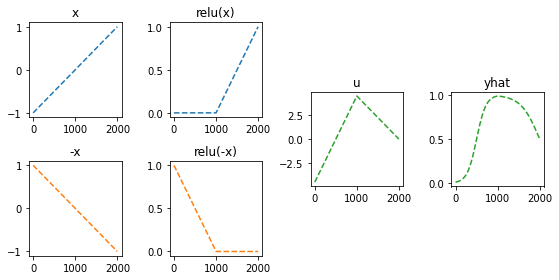%0A)

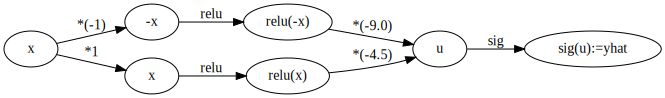

In [183]:
#hide_input
gv('''
"x" -> " -x"[label="*(-1)"];
"x" -> " x"[label="*1"]
" x" -> "relu(x)"[label="relu"] 
" -x" -> "relu(-x)"[label="relu"] 
"relu(x)" -> "u"[label="*(-4.5)"] 
"relu(-x)" -> "u"[label="*(-9.0)"] 
"u" -> "sig(u):=yhat"[label="sig"] 
'''
)

10월4일 강의노트 상황을 일반화하면 아래와 같다. 

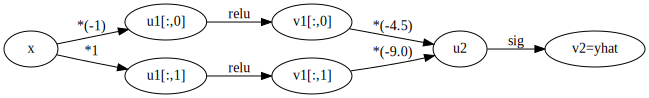

In [185]:
#hide_input
gv('''
"x" -> "u1[:,0]"[label="*(-1)"];
"x" -> "u1[:,1]"[label="*1"]
"u1[:,0]" -> "v1[:,0]"[label="relu"] 
"u1[:,1]" -> "v1[:,1]"[label="relu"] 
"v1[:,0]" -> "u2"[label="*(-4.5)"] 
"v1[:,1]" -> "u2"[label="*(-9.0)"] 
"u2" -> "v2=yhat"[label="sig"] 
'''
)

`-` Layer의 개념: ${\bf X}$에서 $\hat{\boldsymbol y}$로 가는 과정은 "선형변환+비선형변환"이 반복되는 구조이다. "선형변환+비선형변환"을 하나의 세트로 보면 아래와 같이 표현할 수 있다. 

$\underset{(n,1)}{\bf X}  \overset{l_1}{\to} \left( \underset{(n,2)}{\boldsymbol u^{(1)}} \overset{relu}{\to} \underset{(n,2)}{\boldsymbol v^{(1)}} \right) \overset{l_2}{\to} \left(\underset{(n,2)}{\boldsymbol u^{(2)}} \overset{sig}{\to} \underset{(n,2)}{\boldsymbol v^{(2)}}  = \underset{(n,1)}{net({\bf X})=\hat{\boldsymbol y}}\right)$

이것을 다이어그램으로 표현한다면 아래와 같다. 

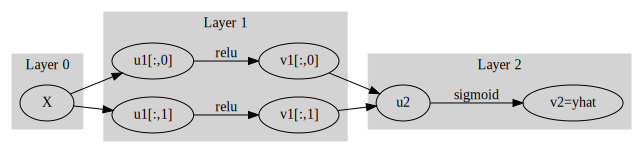

In [187]:
#hide_input
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "X" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "X" -> "u1[:,0]"
    "X" -> "u1[:,1]"
    "u1[:,0]" -> "v1[:,0]"[label="relu"]
    "u1[:,1]" -> "v1[:,1]"[label="relu"]
    label = "Layer 1"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "v1[:,0]" -> "u2"
    "v1[:,1]" -> "u2"
    "u2" -> "v2=yhat"[label="sigmoid"]
    label = "Layer 2"
}
''')

***Layer를 세는 방법***
- 정석: 학습가능한 파라메터가 몇층으로 있는지... 
- 일부 교재 설명: 입력층은 계산하지 않음, activation layer는 계산하지 않음. 
- 위의 예제의 경우 `number of layer = 2` 이다. 

***Hidden Layer의 수를 세는 방법*** 
- 은닉층은 입력층과 출력층을 제외한 층을 의미한다. (위의 예제에서는 Layer1이 은닉층)
- 즉 은닉층의 수는 `Layer의 수 = Hidden Layer의 수 + 출력층의 수 = Hidden Layer의 수 + 1` 를 활용하여 구한다. (즉 모든 레이어의 수에서 1을 뺀것이 은닉층의 수임) 
- 위의 예제의 경우 `number of hidden layer = 1` 이다. 

`-` node의 개념: 위를 다시 간단하게 아래와 같이 쓸 수 있다. 

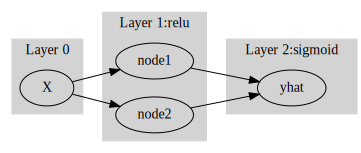

In [189]:
#hide_input
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "X" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "X" -> "node1"
    "X" -> "node2"
    label = "Layer 1:relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "yhat "
    "node2" -> "yhat "
    label = "Layer 2:sigmoid"
}
''')

여기에서 `node의 숫자 = feature의 숫자`와 같이 이해할 수 있다. 즉 아래와 같이 이해할 수 있다. 

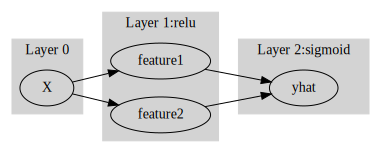

In [190]:
#hide_input
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "X" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "X" -> "feature1"
    "X" -> "feature2"
    label = "Layer 1:relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "feature1" -> "yhat "
    "feature2" -> "yhat "
    label = "Layer 2:sigmoid"
}
''')

> 다이어그램의 표현방식은 교재마다 달라서 모든 예시를 달달 외울 필요는 없습니다. 다만 임의의 다이어그램을 보고 대응하는 네트워크를 pytorch로 구현하는 능력은 매우 중요합니다. 

### 예제3: $\underset{(n,784)}{\bf X} \overset{l_1}{\to} \underset{(n,32)}{\boldsymbol u^{(1)}} \overset{relu}{\to} \underset{(n,32)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{sig}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$  


`-` 다이어그램 

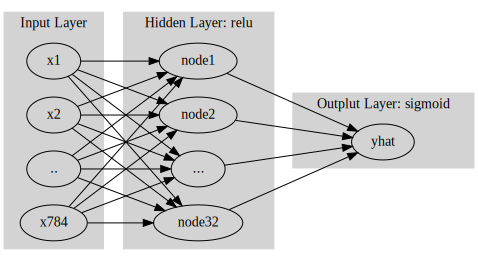

In [215]:
#hide_input
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Input Layer"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node32"
    "x2" -> "node32"
    ".." -> "node32"
    "x784" -> "node32"


    label = "Hidden Layer: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;

    "node1" -> "yhat"
    "node2" -> "yhat"
    "..." -> "yhat"
    "node32" -> "yhat"
    
    label = "Outplut Layer: sigmoid"
}
''')

- Layer0,1,2 대신에 Input Layer, Hidden Layer, Output Layer로 표현함 

`-` 코드구현 

```Python
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=28*28*1,out_features=32),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=32,out_features=1),
    torch.nn.Sigmoid() 
)
```

## 용어의 정리 

## 시벤코정리가 성립하는 이유? (엄밀한 증명 X)

`-` 직관1: sigmoid를 결합하다보면 우연히 아래와 같이 locally compact한 basis를 얻을 수 있다. 

In [357]:
sig = torch.nn.Sigmoid()

In [358]:
l1 = torch.nn.Linear(in_features=1,out_features=2)

In [360]:
l1.weight.data = 
l1.bias.data = 

(Parameter containing:
 tensor([[-0.4007],
         [-0.1170]], requires_grad=True),
 Parameter containing:
 tensor([-0.4111, -0.5409], requires_grad=True))

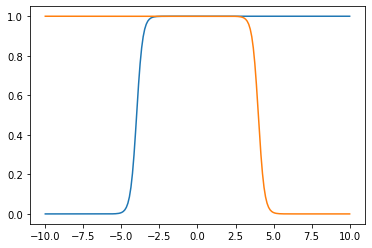

In [344]:
x = torch.linspace(-10,10,200)
plt.plot(x,sig(5*(x+4)))
plt.plot(x,sig(-5*(x-4)))

## 오버피팅과 드랍아웃 

## 차원의 저주

## 넓은 신경망 대신 깊은 신경망을 쓰는 이유? 